In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

# Linie trendu

In [42]:
End = '2017-04-20'

In [43]:
df = pd.read_csv('./data/BTC-USD-19.07.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [44]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=600))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [45]:
df1

,Open,High,Low,Close,Volume
16676.0,231.548996,233.222000,227.330002,229.779999,17142500.0
16677.0,229.895004,232.067993,226.246994,228.761002,19412600.0
16678.0,229.113998,231.955994,225.914993,230.056000,20710700.0
16679.0,230.255997,231.216003,226.860001,228.121002,20575200.0
16680.0,228.026993,230.576996,226.475006,229.283997,18760400.0
...,...,...,...,...,...
17272.0,1172.609985,1187.219971,1172.609985,1182.939941,183231008.0
17273.0,1183.250000,1194.900024,1172.650024,1193.910034,253206000.0
17274.0,1193.770020,1217.569946,1193.770020,1211.670044,270524000.0
17275.0,1212.130005,1215.510010,1205.079956,1210.290039,288060992.0


<AxesSubplot:>

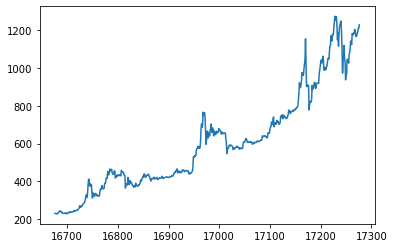

In [46]:
df1['Close'].plot()

In [35]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

if Min_pozycja < Max_pozycja and Max_pozycja < len(df1)-10:
    
    
    #Trend wzrostowy L1
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1 * Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  Wcześniej niż 10 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1 * Bx
                
            Cx = df1.index.max() + 10
            Cy = a1 * Cx + b1
            C = [Cx, Cy]
            
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a1*Cx +b1
                    if Cy>df1.High.mean()*0.3:
                        break
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a1*Cx +b1
                    if Cy < df1.High.max()*(3/2):
                        break

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]
    
    
    #--------------------------------------------------------------------
    # Trend spadkowy M1
    df2 = df1.iloc[Max_pozycja:]
    Min_pozycja2 = df2['Low'].argmin()
    Max_idx2 = df2.iloc[Min_pozycja2].name
    
    
    Ax = df2.iloc[0].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['High'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2 * Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2 * Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2 * Bx
                
            Cx = df21.index.max() + 30
            Cy = a2 * Cx + b2
            C = [Cx, Cy]
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy>df1.High.mean()*0.3:
                        break
                        
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy < df1.High.max()*(3/2):
                        break
            
            

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            
            
#----------------------------------------------------------------------------------------------------------------------

elif Min_pozycja > Max_pozycja and Max_pozycja < len(df1)-10:
    
    # Trend spadkowy L1
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1 * Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a1 = (Ay-By)/(Ax-Bx)
        b1 = By - a1 * Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  Wcześniej niż 10 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1 * Bx
                
            Cx = df1.index.max() -220
            Cy = a1 * Cx + b1
            C = [Cx, Cy]
        
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a1*Cx +b1
                    if Cy>df1.High.mean()*0.3:
                        break
                        
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a1*Cx +b1
                    if Cy < df1.High.max()*(3/2):
                        break

        X_long = [Ax, Cx]
        Y_long = [Ay, Cy]
        
        
# Trend wzrostowy M1
    
    df2 = df1.iloc[Min_pozycja:]
    Max_pozycja2 = df2['High'].argmax()
    Max_idx2 = df2.iloc[Max_pozycja2].name
    
    Ax = df2.iloc[0].name
    Ay = df2['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['Low'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2 * Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']>=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['Low'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2 * Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['Low'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2 * Bx
                
            Cx = df2.index.max() +10
            Cy = a2 * Cx + b2
            C = [Cx, Cy]
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy>df1.High.mean()*0.3:
                        break
                        
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy < df1.High.max()*(3/2):
                        break

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            
else:
    print('Max/Min znajduje się w ostatnich 10 dniach anlalizowanego okresu')


Pierwszy trend:  Wzrostowy
Max/Min:  Wcześniej niż 10 dni od końca
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy
Punkt A:[16449.0, 171.509995], Punkt C: [17286.0, 276.8181296278026]
------------------------------------------------------------------------------
TREND M1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu
Punkt A:[17228.0, 1280.310059], Punkt C: [17280.0, 1232.9882390000057]


# Tunele

In [15]:
End = '2017-05-15'

In [16]:
End = pd.to_datetime(End)
dfxx = df.loc[Start:End]
dfxx.index = dfxx.index.map(mdates.date2num)

In [17]:
#Zakres szukania i podstawione wartości z linie trendu
dfM1 = dfxx[Max_idx2:]
dfM1['TrendLine'] = dfM1.index * a2 + b2

#Sprawdzamy położenie Lini trendu względem ceny zamknięcia i ceny otwarcia
dfM1['Distance(Close-TL)'] = dfM1['TrendLine'] - dfM1['Close']
dfM1['Distance(Open-TL)'] = dfM1['TrendLine'] - dfM1['Open']

#Trend wzrostowy
if a2 > 0:
    #Zbieramy wartości dla trendu wzrostowego i spadkowego
    GrowingTLClose = len(dfM1.index[dfM1['Distance(Close-TL)']>0])
    GrowingTLOpen = len(dfM1.index[dfM1['Distance(Open-TL)']>0])
    
    #Jeśli trend został przełamany
    if GrowingTLClose > 0 or GrowingTLOpen > 0:
        
        GrowingTLClosePosition = dfM1.index[dfM1['Distance(Close-TL)']>0][0]
        GrowingTLOpenPosition = dfM1.index[dfM1['Distance(Open-TL)']>0][0]
        
        if GrowingTLClosePosition < GrowingTLOpenPosition:
            print('Klasycznie w dół')

            BPPosition = GrowingTLClosePosition

            print(f'Pozycja przecięcia: {BPPosition}')

        elif GrowingTLClosePosition > GrowingTLOpenPosition:
            print('Cena otwacia pod TL, cena zamknięcia nad TL')

            BPPosition = GrowingTLOpenPosition

            print(f'Pozycja przecięcia: {BPPosition}')

        elif GrowingTLClosePosition == GrowingTLOpenPosition:
            print('Cała świeca pod TL')

            BPPosition = GrowingTLClosePosition - 1

            print(f'Pozycja przecięcia: {BPPosition}')
        
        BPPrice = BPPosition * a2 + b2
        print(f'Cena przecięcia: {BPPrice}')

        #-----------------------------------------------------------------    
        
        #Sprawdzamy wielkość tuneli w stosunku do wielkości świec:
        CloseBPPrice = dfM1['Close'].loc[BPPosition]
        OpenBPPrice = dfM1['Open'].loc[BPPosition]

        BPPositionEnd = dfM1.index[-1] + 5
        UplineX = [BPPosition, BPPositionEnd]
        DownlineX = [BPPosition, BPPositionEnd]
        
        #Klasycznie
        if GrowingTLClosePosition < GrowingTLOpenPosition:
            print('Przerwanie trendu wzrostowego w dół - klasycznie')

            TunelHeight = BPPrice - CloseBPPrice
            CandleHeight = OpenBPPrice - CloseBPPrice
            
            #Jeśli lunel mniejszy niż 1/4 świeczki
            if TunelHeight/CandleHeight <1/4:
            
                UplineY = [OpenBPPrice, OpenBPPrice]
                DownlineY = [CloseBPPrice, CloseBPPrice]
                BP1 = [BPPosition, CloseBPPrice]

            else:

                UplineY = [BPPrice, BPPrice]
                DownlineY = [CloseBPPrice, CloseBPPrice]
                BP1 = [BPPosition, BPPrice]
        #---------------------------------------------------------------

        #Cena open pod close nas TL    
        elif GrowingTLClosePosition > GrowingTLOpenPosition:
            print('Przerwanie trendu wzrostowego w dół - ceną otwarcia')  
            

            TunelHeight = CloseBPPrice - BPPrice
            CandleHeight = CloseBPPrice - OpenBPPrice
            
            #Jeśli tunel mniejszy niz 1/4 świecy
            if TunelHeight/CandleHeight <1/4:
            
                UplineY = [CloseBPPrice, CloseBPPrice]
                DownlineY = [OpenBPPrice, OpenBPPrice]
                BP1 = [BPPosition, OpenBPPrice]

            else:

                UplineY = [CloseBPPrice, CloseBPPrice]
                DownlineY = [BPPrice, BPPrice]
                BP1 = [BPPosition, BPPrice]
        #----------------------------------------------------

        #Open i Close pod TL    
        elif GrowingTLClosePosition == GrowingTLOpenPosition:
            print('Przerwanie trendu wzrostowego w dół - całą świecą') 

            #Jeśli Open większe niż close
            if OpenBPPrice > CloseBPPrice:

                UplineY = [OpenBPPrice, OpenBPPrice]
                DownlineY = [BPPrice, BPPrice]

            #Jeśli Close większe od Open    
            else:

                UplineY = [CloseBPPrice, CloseBPPrice]
                DownlineY = [BPPrice, BPPrice]
                
            BP1 = [BPPosition, BPPrice]
        #--------------------------------------------------------------------------------------------------
        
        #Wyświetlamy wyniki
        
        print('-----------------------------------------------')            
        print(f'Wybrany poziom oporu: {UplineY[0]}')
        print(f'Wybrany poziom wsparcia: {DownlineY[0]}')
        print(f'Pierwszy punkt przecięcia: {BPPrice}')
        
        
    else:
        print('Trend nie został przełamany')
        
#------------------------------------------------------------------------------------------------------------------------------   
    
    
elif a2 < 0:
    
    #Zbieramy wartości dla trendu wzrostowego i spadkowego
    DecliningTLClose = len(dfM1.index[dfM1['Distance(Close-TL)']<0])
    DecliningTLOpen = len(dfM1.index[dfM1['Distance(Open-TL)']<0])
    
    if DecliningTLClose > 0 or DecliningTLOpen > 0:
        
        DecliningTLClosePosition = dfM1.index[dfM1['Distance(Close-TL)']<0][0]
        DecliningTLOpenPosition = dfM1.index[dfM1['Distance(Open-TL)']<0][0]
        
        
        if DecliningTLClosePosition < DecliningTLOpenPosition:
            print('Klasycznie w górę')

            BPPosition = DecliningTLClosePosition
            
            print(f'Pozycja przecięcia: {BPPosition}')
           
        elif DecliningTLClosePosition > DecliningTLOpenPosition:
            print('Cena otwacia nad TL, cena zamknięcia pod TL')

            BPPosition = DecliningTLOpenPosition

            print(f'Pozycja przecięcia: {BPPosition}')

        elif DecliningTLClosePosition == DecliningTLOpenPosition:
            print('Cała świeca nad TL')

            BPPosition = DecliningTLClosePosition - 1

            print(f'Pozycja przecięcia: {BPPosition}')
            
        BPPrice = BPPosition * a2 + b2
        print(f'Cena przecięcia: {BPPrice}')
        #-----------------------------------------------------------------------
        
        #Sprawdzamy wielkość tuneli w stosunku do wielkości świec:
        CloseBPPrice = dfM1['Close'].loc[BPPosition]
        OpenBPPrice = dfM1['Open'].loc[BPPosition]
        
        BPPositionEnd = dfM1.index[-1] + 5
        UplineX = [BPPosition, BPPositionEnd]
        DownlineX = [BPPosition, BPPositionEnd]
        
        #Klasycznie
        if DecliningTLClosePosition < DecliningTLOpenPosition:
            print('Przerwanie trendu spadkowego w górę - klasycznie')
            
            TunelHeight = CloseBPPrice - BPPrice
            CandleHeight = CloseBPPrice - OpenBPPrice
            
            #Jeśli tunel mniejszy niż 1/4 świecy
            if TunelHeight/CandleHeight <1/4:

                UplineY = [CloseBPPrice, CloseBPPrice]
                DownlineY = [OpenBPPrice, OpenBPPrice]
                BP1 = [BPPosition, OpenBPPrice]

            else:

                UplineY = [CloseBPPrice, CloseBPPrice]
                DownlineY = [BPPrice, BPPrice]
                BP1 = [BPPosition, BPPrice]
        #---------------------------------------------------------------
        
        #Cena open nad close pod TL    
        elif DecliningTLClosePosition > DecliningTLOpenPosition:
            print('Przerwanie trendu spadkowego w górę - ceną otwarcia')
            
            TunelHeight = BPPrice - CloseBPPrice
            CandleHeight = OpenBPPrice - CloseBPPrice
            
            #Jeśli tuel mniejszy niż 1/4 świecy
            if TunelHeight/CandleHeight <1/4:

                UplineY = [OpenBPPrice, OpenBPPrice]
                DownlineY = [CloseBPPrice, CloseBPPrice]
                BP1 = [BPPosition, OpenBPPrice]

            else:

                UplineY = [BPPrice, BPPrice]
                DownlineY = [CloseBPPrice, CloseBPPrice]
                BP1 = [BPPosition, BPPrice]
        #-------------------------------------------------------------
        
        #Open i close nad TL    
        elif DecliningTLClosePosition == DecliningTLOpenPosition:
            print('Przerwanie trendu spadkowego w górę - całą świecą')

            #Jeśli Open wyższe niż close
            if OpenBPPrice > CloseBPPrice:

                UplineY = [BPPrice, BPPrice]
                DownlineY = [CloseBPPrice, CloseBPPrice]
                BP1 = [BPPosition, BPPrice]
            
            #Jeśli Close wyższe niż open
            else:

                UplineY = [BPPrice, BPPrice]
                DownlineY = [OpenBPPrice, OpenBPPrice]
                BP1 = [BPPosition, BPPrice]
        #----------------------------------------------------------------------------------------------------
        
        #Wyświetlamy wyniki
        print('-----------------------------------------------')            
        print(f'Wybrany poziom oporu: {UplineY[0]}')
        print(f'Wybrany poziom wsparcia: {DownlineY[0]}')
        print(f'Pierwszy punkt przecięcia: {BPPrice}')
        
    else:
        print('Brak przełamań lini trendu')


Klasycznie w górę
Pozycja przecięcia: 17280.0
Cena przecięcia: 1232.9882390000057
Przerwanie trendu spadkowego w górę - klasycznie
-----------------------------------------------
Wybrany poziom oporu: 1250.150024
Wybrany poziom wsparcia: 1232.9882390000057
Pierwszy punkt przecięcia: 1232.9882390000057


# Breaking points

In [18]:
#Sprawdzamy czy istnieje BP1, jeśli tak to tunele zostały wyznaczone
try:
    BP1
except NameError:

    print("Brak tuneli - trend nie został przełamany lub został przełamany zbyt dawno")

#Jeśli BP1 istnieje
else:
    
    dfM1a = dfxx[BPPosition:]

    dfM1a['DownLine'] = DownlineY[0]
    dfM1a['UpLine'] = UplineY[0]
    dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
    dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']
    
    
    #Liczymy przecięcia tuneli tuneli
    DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
    UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])


    #Jeżeli tylko przebicie w dół
    if DownBreaks > 0 and UpBreaks == 0:

        BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
        BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]
        BP1 = [BPPosition, BPPrice]
        BP2 = [BP2Position, BP2Price]
        BP3 = BP2

        BreakHeight = DownlineY[0] - BP2Price
        TunelHeight = UplineY[0] - DownlineY[0]

        if BreakHeight >= 0.5 * TunelHeight:

            print('BP2 breaks Tunel by more than 50% height of tunel')
            print('Short position recomended')

        #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
        elif dfM1a['Close'].loc[BP2Position +1] < BP2Price and BreakHeight >= 0.1 * TunelHeight and BreakHeight < 0.5 * TunelHeight:

            print('---------------------------------------------------------------------')
            print('Close price after BP is lower than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
            print('Long position recomended')

        else:
            print('No decisice BP yet')


    #Jeśeli tylko przebicie w górę
    elif UpBreaks > 0 and DownBreaks == 0:

        BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
        BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
        BP1 = [BPPosition, BPPrice]
        BP3 = [BP3Position, BP3Price]
        BP2 = BP3

        print('Second BP founded')
        print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')

        BreakHeight = BP3Price - UplineY[0]
        TunelHeight = UplineY[0] - DownlineY[0]
        
        ClosePriceAfterBP3 = dfM1a['Close'].loc[BP3Position + 1]
        TunelToCPABP3 = ClosePriceAfterBP3 - UplineY[0]

        if BreakHeight >= 0.5 * TunelHeight:

            print('------------------------------------------------')
            print('BP2 breaks Tunel by more than 50% height of tunel')
            print('Long position recomended')
            

        #Sprawdzamy, wielkość i cene zamknięcia drugiej świeczki po BP3
        elif TunelToCPABP3 > 0.5* TunelHeight and BreakHeight >= 0.1 * TunelHeight and BreakHeight < 0.5 * TunelHeight:

            print('---------------------------------------------------------------------')
            print('BP2 przebija cena powyżej 10% wielkości tunelu')
            print('Przebicie świeczki następującej po BP3 jest większe niż 50% wielkości tunelu ')
            print('Long position recomended')

        else:
            print('No decisice BP yet')

    #Jeśli przebicie w górę i dół
    elif DownBreaks > 0 and UpBreaks > 0:

        BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
        BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]

        BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
        BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]

        #Jeśli BP2 (przebicie w dół) wystąpiło przed BP3 (przebicie w górę)
        if BP2Position < BP3Position:

            BP2 = [BP2Position, BP2Price]
            BP3 = [BP3Position, BP3Price]

            print('Long Position recomended')
            print(f'First Break Point: {BP1}')
            print(f'Second Break Point: {BP2}')
            print(f'Third and decisive Break Point: {BP3}')

        #Jeśli BP3 (przebicie w górę) wystąpiło przed BP2 (przebicie w dół)
        elif BP2Position > BP3Position:


            BP2 = [BP2Position, BP2Price]
            BP3 = [BP3Position, BP3Price]

            print('Short Position recomended')
            print(f'First Break Point: {BP1}')
            print(f'Second Break Point: {BP3}')
            print(f'Third and decisive Break Point: {BP2}')

    #Jeśli brak kolejnych przebić    
    else:
        print('No 2nd and 3rd BP yet')

Second BP founded
BP2Price: 1265.48999, BP2Position: 17281.0
------------------------------------------------
BP2 breaks Tunel by more than 50% height of tunel
Long position recomended


# Wykres

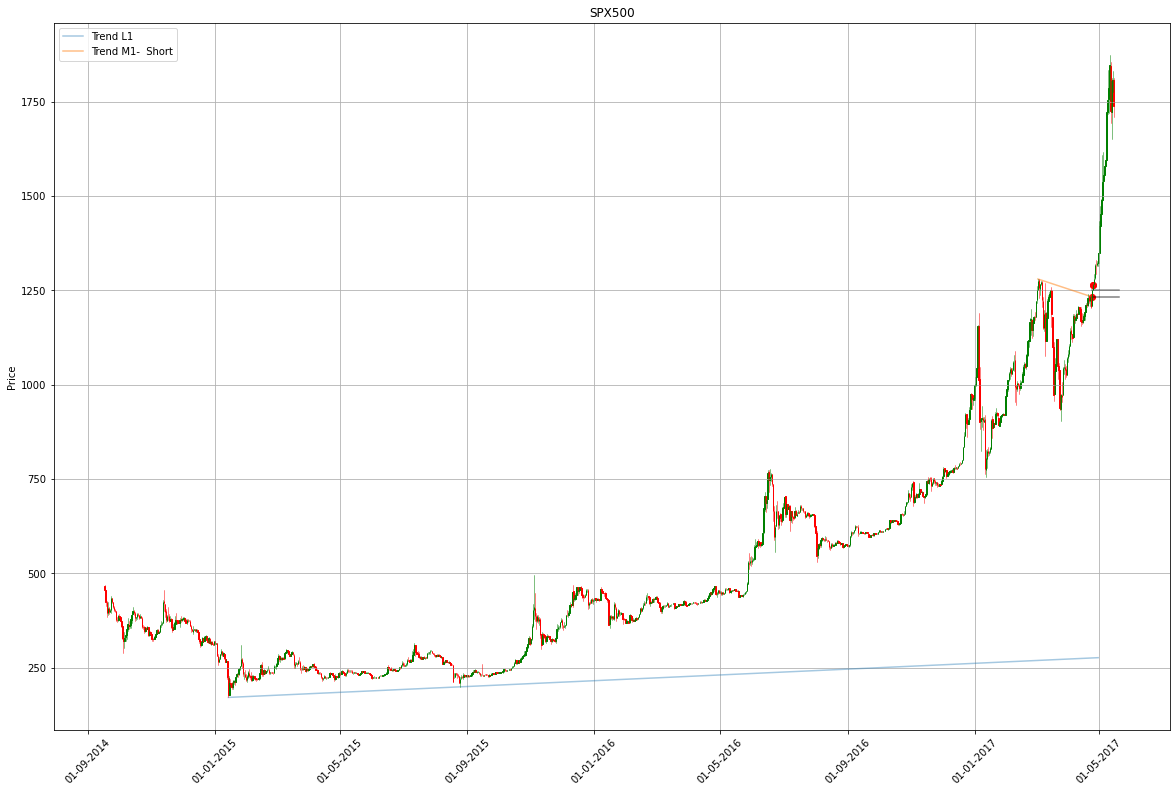

In [19]:
#Sprawdzamy czy istnieje BP1, jeśli tak to tunele zostały wyznaczone
try:
    BP1
except NameError:
    
    #Wykres bez tuneli
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    

#Jeśli BP1 istnieje
else:
    
    try:
        BP2
        
    except NameError:
        
        #Wykres z tunelami bez BP2 i BP3
        dfxx.reset_index(inplace = True)
        dfM1.reset_index(inplace = True)
        

        fig = plt.figure(figsize=(20,13))
        ax1 = fig.add_subplot(111)
        ax2 = fig.add_subplot(111)
        ax3 = fig.add_subplot(111)

        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
        ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

        ax3.plot(UplineX, UplineY, color='black', alpha = 0.4)
        ax3.plot(DownlineX, DownlineY, color='black', alpha = 0.5)

        plt.ylabel("Price")
        plt.title('SPX500')
        ax1.grid(True)
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
        plt.show()
        
        
    else:
        #Wykres z tunelami i BP2 lub BP3 lub (BP2 i BP3)
        
        dfxx.reset_index(inplace = True)
        dfM1.reset_index(inplace = True)
        dfM1a.reset_index(inplace = True)

        fig = plt.figure(figsize=(20,13))
        ax1 = fig.add_subplot(111)
        ax2 = fig.add_subplot(111)
        ax3 = fig.add_subplot(111)
        ax4 = fig.add_subplot(111)


        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
        ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

        ax3.plot(UplineX, UplineY, color='black', alpha = 0.4)
        ax3.plot(DownlineX, DownlineY, color='black', alpha = 0.5)

        ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )

        plt.ylabel("Price")
        plt.title('SPX500')
        ax1.grid(True)
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
        plt.show()
    

# Sprawdamy kolejne przerwania lini trendu

In [20]:
End = '2021-06-15'

In [21]:
End = pd.to_datetime(End)
dfyy = df.loc[Start:End]
dfyy.index = dfyy.index.map(mdates.date2num)

In [22]:
#Sprawdzamy czy trend został przełamany po raz 1
try:
    BP1
    
#Jeśli nie ma BP11    
except NameError:

    print("Trend nie został jeszcze przerwany - brak powrotu do trendu")

#Jeśli BP11 istnieje
else:
    
    dfM11 = dfyy[BP2[0]+1:]
    dfM11['TrendLine'] = dfM11.index * a2 + b2

    #W tym przypadku sprawdzamy jedynie ceny zamknięcia
    #Szukamy dalej jeżeli cena zamknięcia przebiła TL w górę dla trendu wzrostowego
    
    #Sprawdzamy położenie Lini trendu względem ceny zamknięcia
    dfM11['Distance(Close-TL)'] = dfM11['TrendLine'] - dfM11['Close']
    
    #Trend wzrostowy
    if a2 > 0:
        
        GrowingTLUp = len(dfM11.index[dfM11['Distance(Close-TL)']>0])

        #Sprawdzamy przecięcia TL
        if GrowingTLUp == 0:            
            
            #Jeśli linia trendu nie została przebita spowrotem w górę:
            print('Linia trendu nie została powtórnie przerwana ceną zamknięcia, nie szukamy kolejnych przecięć w dół')
            
            
        else:
            
            #Jeśli linia trendu została przecięta ponownie w górę:
            Position2 = dfM11.index[dfM11['Distance(Close-TL)']>0][0]
            
            print('Ponowne przerwanie trendu Wzrostowego w górę, możemy szukać kolejnych przełamań')
            print(f'Pozycja przerwania: {Position2}')
            print('-------------------------------------------------------------------------------')
            
            #Zakres szukania i podstawione wartości z linie trendu
            dfM11 = dfyy[Position2:]
            dfM11['TrendLine'] = dfM11.index * a2 + b2
            
            #Sprawdzamy położenie Lini trendu względem ceny zamknięcia i ceny otwarcia
            dfM11['Distance(Close-TL)'] = dfM11['TrendLine'] - dfM11['Close']
            dfM11['Distance(Open-TL)'] = dfM11['TrendLine'] - dfM11['Open']
   
            #Zbieramy wartości dla trendu wzrostowego i spadkowego
            GrowingTLClose = len(dfM11.index[dfM11['Distance(Close-TL)']>0])
            GrowingTLOpen = len(dfM11.index[dfM11['Distance(Open-TL)']>0])
            
            #Jeśli trend został przełamany
            if GrowingTLClose > 0 or GrowingTLOpen > 0:
    
                GrowingTLClosePosition2 = dfM11.index[dfM11['Distance(Close-TL)']>0][0]
                GrowingTLOpenPosition2 = dfM11.index[dfM11['Distance(Open-TL)']>0][0]

                if GrowingTLClosePosition2 < GrowingTLOpenPosition2:
                    print('Klasycznie w dół')

                    BPPosition2 = GrowingTLClosePosition2

                    print(f'Pozycja przecięcia: {BPPosition2}')

                elif GrowingTLClosePosition2 > GrowingTLOpenPosition2:
                    print('Cena otwacia pod TL, cena zamknięcia nad TL')

                    BPPosition2 = GrowingTLOpenPosition2

                    print(f'Pozycja przecięcia: {BPPosition2}')

                elif GrowingTLClosePosition2 == GrowingTLOpenPosition2:
                    print('Cała świeca pod TL')

                    BPPosition2 = GrowingTLClosePosition2 - 1

                    print(f'Pozycja przecięcia: {BPPosition2}')

                BPPrice2 = BPPosition2 * a2 + b2
                print(f'Cena przecięcia: {BPPrice2}')

                #-----------------------------------------------------------------    

                #Sprawdzamy wielkość tuneli w stosunku do wielkości świec:
                CloseBPPrice2 = dfM11['Close'].loc[BPPosition2]
                OpenBPPrice2 = dfM11['Open'].loc[BPPosition2]

                BPPosition2End = dfM11.index[-1] + 5
                UplineX = [BPPosition2, BPPosition2End]
                DownlineX = [BPPosition2, BPPosition2End]

                #Klasycznie
                if GrowingTLClosePosition2 < GrowingTLOpenPosition2:
                    print('Przerwanie trendu wzrostowego w dół - klasycznie')

                    TunelHeight = BPPrice2 - CloseBPPrice2
                    CandleHeight = OpenBPPrice2 - CloseBPPrice2

                    #Jeśli lunel mniejszy niż 1/4 świeczki
                    if TunelHeight/CandleHeight <1/4:

                        UplineY = [OpenBPPrice2, OpenBPPrice2]
                        DownlineY = [CloseBPPrice2, CloseBPPrice2]
                        BP11 = [BPPosition2, CloseBPPrice2]

                    else:

                        UplineY = [BPPrice2, BPPrice2]
                        DownlineY = [CloseBPPrice2, CloseBPPrice2]
                        BP11 = [BPPosition2, BPPrice2]
                #---------------------------------------------------------------

                #Cena open pod close nas TL    
                elif GrowingTLClosePosition2 > GrowingTLOpenPosition2:
                    print('Przerwanie trendu wzrostowego w dół - ceną otwarcia')  


                    TunelHeight = CloseBPPrice2 - BPPrice2
                    CandleHeight = CloseBPPrice2 - OpenBPPrice2

                    #Jeśli tunel mniejszy niz 1/4 świecy
                    if TunelHeight/CandleHeight <1/4:

                        UplineY = [CloseBPPrice2, CloseBPPrice2]
                        DownlineY = [OpenBPPrice2, OpenBPPrice2]
                        BP11 = [BPPosition2, OpenBPPrice2]

                    else:

                        UplineY = [CloseBPPrice2, CloseBPPrice2]
                        DownlineY = [BPPrice2, BPPrice2]
                        BP11 = [BPPosition2, BPPrice2]
                #----------------------------------------------------

                #Open i Close pod TL    
                elif GrowingTLClosePosition2 == GrowingTLOpenPosition2:
                    print('Przerwanie trendu wzrostowego w dół - całą świecą') 

                    #Jeśli Open większe niż close
                    if OpenBPPrice2 > CloseBPPrice2:

                        UplineY = [OpenBPPrice2, OpenBPPrice2]
                        DownlineY = [BPPrice2, BPPrice2]

                    #Jeśli Close większe od Open    
                    else:

                        UplineY = [CloseBPPrice2, CloseBPPrice2]
                        DownlineY = [BPPrice2, BPPrice2]

                    BP11 = [BPPosition2, BPPrice2]
                #--------------------------------------------------------------------------------------------------

                #Wyświetlamy wyniki

                print('-----------------------------------------------')            
                print(f'Wybrany poziom oporu: {UplineY[0]}')
                print(f'Wybrany poziom wsparcia: {DownlineY[0]}')
                print(f'Pierwszy punkt przecięcia: {BPPrice2}')


            else:
                print('Trend nie został przełamany')
    

    elif a2 <0:
        
        DecliningTLDown = len(dfM11['Close'][dfM11['Distance(Close-TL)']>0])
        
        if DecliningTLDown == 0:
            print('Nie ma przebicia')
            
            
        else:
            
            Position2 = dfM11.index[dfM11['Distance(Close-TL)']>0][0]
            print('Ponowne przerwanie trendu spadkowego w dół, możemy szukać kolejnych przełamań')
            print(f'Pozaycja przerwania: {Position2}')
            print('-------------------------------------------------------------------------------')
            
            dfM11 = dfyy[Position2:]
            dfM11['TrendLine'] = dfM11.index * a2 + b2
            
            #Sprawdzamy położenie Lini trendu względem ceny zamknięcia i ceny otwarcia
            dfM11['Distance(Close-TL)'] = dfM11['TrendLine'] - dfM11['Close']
            dfM11['Distance(Open-TL)'] = dfM11['TrendLine'] - dfM11['Open']
            
            
            #Zbieramy wartości dla trendu wzrostowego i spadkowego
            DecliningTLClose = len(dfM11.index[dfM11['Distance(Close-TL)']<0])
            DecliningTLOpen = len(dfM11.index[dfM11['Distance(Open-TL)']<0])

            if DecliningTLClose > 0 or DecliningTLOpen > 0:

                DecliningTLClosePosition2 = dfM11.index[dfM11['Distance(Close-TL)']<0][0]
                DecliningTLOpenPosition2 = dfM11.index[dfM11['Distance(Open-TL)']<0][0]


                if DecliningTLClosePosition2 < DecliningTLOpenPosition2:
                    print('Klasycznie w górę')

                    BPPosition2 = DecliningTLClosePosition2

                    print(f'Pozycja przecięcia: {BPPosition2}')

                elif DecliningTLClosePosition2 > DecliningTLOpenPosition2:
                    print('Cena otwacia nad TL, cena zamknięcia pod TL')

                    BPPosition2 = DecliningTLOpenPosition2

                    print(f'Pozycja przecięcia: {BPPosition2}')

                elif DecliningTLClosePosition2 == DecliningTLOpenPosition2:
                    print('Cała świeca nad TL')

                    BPPosition2 = DecliningTLClosePosition2 - 1

                    print(f'Pozycja przecięcia: {BPPosition2}')

                BPPrice2 = BPPosition2 * a2 + b2
                print(f'Cena przecięcia: {BPPrice2}')
                #-----------------------------------------------------------------------

                #Sprawdzamy wielkość tuneli w stosunku do wielkości świec:
                CloseBPPrice2 = dfM11['Close'].loc[BPPosition2]
                OpenBPPrice2 = dfM11['Open'].loc[BPPosition2]

                BPPosition2End = dfM11.index[-1] + 5
                UplineX = [BPPosition2, BPPosition2End]
                DownlineX = [BPPosition2, BPPosition2End]

                #Klasycznie
                if DecliningTLClosePosition2 < DecliningTLOpenPosition2:
                    print('Przerwanie trendu spadkowego w górę - klasycznie')

                    TunelHeight = CloseBPPrice2 - BPPrice2
                    CandleHeight = CloseBPPrice2 - OpenBPPrice2

                    #Jeśli tunel mniejszy niż 1/4 świecy
                    if TunelHeight/CandleHeight <1/4:

                        UplineY = [CloseBPPrice2, CloseBPPrice2]
                        DownlineY = [OpenBPPrice2, OpenBPPrice2]
                        BP11 = [BPPosition2, OpenBPPrice2]

                    else:

                        UplineY = [CloseBPPrice2, CloseBPPrice2]
                        DownlineY = [BPPrice2, BPPrice2]
                        BP11 = [BPPosition2, BPPrice2]
                #---------------------------------------------------------------

                #Cena open nad close pod TL    
                elif DecliningTLClosePosition2 > DecliningTLOpenPosition2:
                    print('Przerwanie trendu spadkowego w górę - ceną otwarcia')

                    TunelHeight = BPPrice2 - CloseBPPrice2
                    CandleHeight = OpenBPPrice2 - CloseBPPrice2

                    #Jeśli tuel mniejszy niż 1/4 świecy
                    if TunelHeight/CandleHeight <1/4:

                        UplineY = [OpenBPPrice2, OpenBPPrice2]
                        DownlineY = [CloseBPPrice2, CloseBPPrice2]
                        BP11 = [BPPosition2, OpenBPPrice2]

                    else:

                        UplineY = [BPPrice2, BPPrice2]
                        DownlineY = [CloseBPPrice2, CloseBPPrice2]
                        BP11 = [BPPosition2, BPPrice2]
                #-------------------------------------------------------------

                #Open i close nad TL    
                elif DecliningTLClosePosition2 == DecliningTLOpenPosition2:
                    print('Przerwanie trendu spadkowego w górę - całą świecą')

                    #Jeśli Open wyższe niż close
                    if OpenBPPrice2 > CloseBPPrice2:

                        UplineY = [BPPrice2, BPPrice2]
                        DownlineY = [CloseBPPrice2, CloseBPPrice2]
                        BP11 = [BPPosition2, BPPrice2]

                    #Jeśli Close wyższe niż open
                    else:

                        UplineY = [BPPrice2, BPPrice2]
                        DownlineY = [OpenBPPrice2, OpenBPPrice2]
                        BP11 = [BPPosition2, BPPrice2]
                #----------------------------------------------------------------------------------------------------

                #Wyświetlamy wyniki
                print('-----------------------------------------------')            
                print(f'Wybrany poziom oporu: {UplineY[0]}')
                print(f'Wybrany poziom wsparcia: {DownlineY[0]}')
                print(f'Pierwszy punkt przecięcia: {BPPrice2}')

            else:
                print('Brak przełamań lini trendu')
        
        
            
    
    

Nie ma przebicia


In [23]:

            DecliningTLOpen
            

21

In [24]:
ok = len(dfM11['Close'][dfM11['Distance(Close-TL)']>0])
if ok == 0:
    print('nie')
else:
    print('tak')
    if DecliningTLClose > 0 or DecliningTLOpen > 0:
        DecliningTLClosePosition2 = dfM11.index[dfM11['Distance(Close-TL)']<0][0]

nie


In [25]:
DecliningTLOpen

21

In [26]:
len(dfM11.index[dfM11['Distance(Close-TL)']<0])

1504

# Next breaking points

In [451]:
#Sprawdzamy czy istnieje BP11, jeśli tak to tunele zostały wyznaczone
try:
    BP11
except NameError:

    print("Brak tuneli - trend nie został przełamany lub został przełamany zbyt dawno")

#Jeśli BP11 istnieje
else:
    
    dfM11a = dfyy[BPPosition2:]

    dfM11a['DownLine'] = DownlineY[0]
    dfM11a['UpLine'] = UplineY[0]
    dfM11a['Down-Close'] = dfM11a['Close'] - dfM11a['DownLine']
    dfM11a['UP-Close'] = dfM11a['UpLine'] - dfM11a['Close']
    
    
    #Liczymy przecięcia tuneli tuneli
    DownBreaks = len(dfM11a['Close'][dfM11a['Down-Close'] < 0])
    UpBreaks = len(dfM11a['Close'][dfM11a['UP-Close'] < 0])


    #Jeżeli tylko przebicie w dół
    if DownBreaks > 0 and UpBreaks == 0:

        BP12Price2 = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
        BP12Position2 = dfM11a.index[dfM11a['Down-Close']<0][0]
        BP11 = [BPPosition2, BPPrice2]
        BP12 = [BP12Position2, BP12Price2]
        BP13 = BP12

        BreakHeight = DownlineY[0] - BP12Price2
        TunelHeight = UplineY[0] - DownlineY[0]

        if BreakHeight >= 0.5 * TunelHeight:

            print('BP12 breaks Tunel by more than 50% height of tunel')
            print('Short Position2 recomended')

        #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
        elif dfM11a['Close'].loc[BP12Position2 +1] < BP12Price2 and BreakHeight >= 0.3 * TunelHeight and BreakHeight < 0.5 * TunelHeight:

            print('---------------------------------------------------------------------')
            print('Close Price2 after BP is lower than BP close Price2 and BP12 breaks Tunel by more than 30% height of tunel')
            print('Long Position2 recomended')

        else:
            print('No decisice BP yet')


    #Jeśeli tylko przebicie w górę
    elif UpBreaks > 0 and DownBreaks == 0:

        BP13Price2 = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
        BP13Position2 = dfM11a.index[dfM11a['UP-Close'] < 0][0]
        BP11 = [BPPosition2, BPPrice2]
        BP13 = [BP13Position2, BP13Price2]
        BP12 = BP13

        print('Second BP founded')
        print(f'BP12Price2: {BP13Price2}, BP12Position2: {BP13Position2}')

        BreakHeight = BP13Price2 - UplineY[0]
        TunelHeight = UplineY[0] - DownlineY[0]

        if BreakHeight >= 0.5 * TunelHeight:

            print('------------------------------------------------')
            print('BP12 breaks Tunel by more than 50% height of tunel')
            print('Long Position2 recomended')


        #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:
        elif dfM11a['Close'].loc[BP13Position2 + 1] > BP13Price2 and BreakHeight >= 0.3 * TunelHeight and BreakHeight < 0.5 * TunelHeight:

            print('---------------------------------------------------------------------')
            print('Close Price2 after BP is higher than BP close Price2 and BP12 breaks Tunel by more than 30% height of tunel')
            print('Long Position2 recomended')

        else:
            print('No decisice BP yet')

    #Jeśli przebicie w górę i dół
    elif DownBreaks > 0 and UpBreaks > 0:

        BP12Price2 = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
        BP12Position2 = dfM11a.index[dfM11a['Down-Close']<0][0]

        BP13Price2 = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
        BP13Position2 = dfM11a.index[dfM11a['UP-Close'] < 0][0]

        #Jeśli BP12 (przebicie w dół) wystąpiło przed BP13 (przebicie w górę)
        if BP12Position2 < BP13Position2:

            BP12 = [BP12Position2, BP12Price2]
            BP13 = [BP13Position2, BP13Price2]

            print('Long Position2 recomended')
            print(f'First Break Point: {BP11}')
            print(f'Second Break Point: {BP12}')
            print(f'Third and decisive Break Point: {BP13}')

        #Jeśli BP13 (przebicie w górę) wystąpiło przed BP12 (przebicie w dół)
        elif BP12Position2 > BP13Position2:


            BP12 = [BP12Position2, BP12Price2]
            BP13 = [BP13Position2, BP13Price2]

            print('Short Position2 recomended')
            print(f'First Break Point: {BP11}')
            print(f'Second Break Point: {BP13}')
            print(f'Third and decisive Break Point: {BP12}')

    #Jeśli brak kolejnych przebić    
    else:
        print('No 2nd and 3rd BP yet')

No decisice BP yet


# Wykres kolejnych tuneli

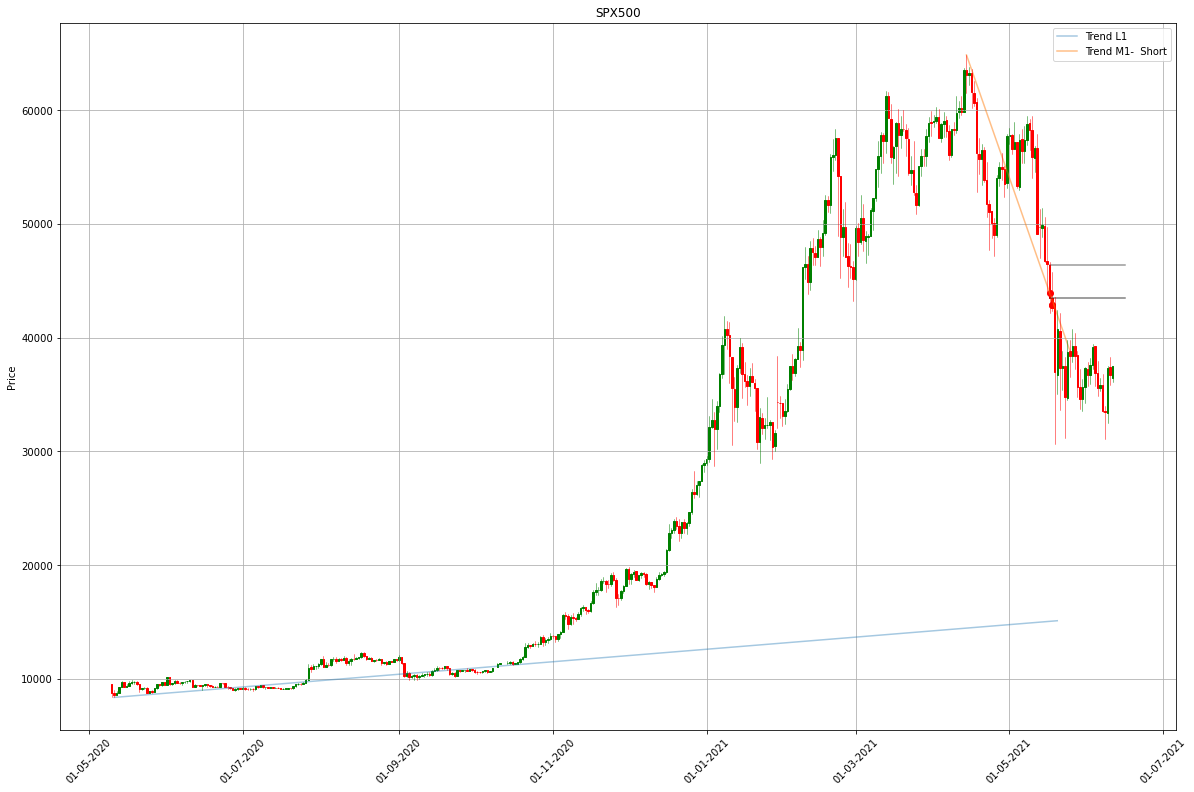

In [452]:
#Sprawdzamy czy istnieje BP1, jeśli tak to tunele zostały wyznaczone
try:
    BP11
except NameError:
    
    
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    

#Jeśli BP1 istnieje
else:
    
    try:
        BP12
        
    except NameError:
        
        #Wykres z tunelami bez BP2 i BP3
        dfyy.reset_index(inplace = True)
        dfM11.reset_index(inplace = True)
        

        fig = plt.figure(figsize=(20,13))
        ax1 = fig.add_subplot(111)
        ax2 = fig.add_subplot(111)
        ax3 = fig.add_subplot(111)

        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
        ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

        ax3.plot(UplineX, UplineY, color='black', alpha = 0.4)
        ax3.plot(DownlineX, DownlineY, color='black', alpha = 0.5)

        plt.ylabel("Price")
        plt.title('SPX500')
        ax1.grid(True)
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        candlestick_ohlc(ax1, dfyy.values, width=0.6, colorup='g', colordown='r')
        plt.show()
        
        
    else:
        #Wykres z tunelami i BP2 lub BP3 lub (BP2 i BP3)
        
        dfyy.reset_index(inplace = True)
        dfM11.reset_index(inplace = True)
        dfM11a.reset_index(inplace = True)

        fig = plt.figure(figsize=(20,13))
        ax1 = fig.add_subplot(111)
        ax2 = fig.add_subplot(111)
        ax3 = fig.add_subplot(111)
        ax4 = fig.add_subplot(111)


        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
        ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

        ax3.plot(UplineX, UplineY, color='black', alpha = 0.4)
        ax3.plot(DownlineX, DownlineY, color='black', alpha = 0.5)

        ax4.scatter(BP11[0], BP11[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax4.scatter(BP12[0], BP12[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax4.scatter(BP13[0], BP13[1], alpha=1, color = 'red', edgecolors = 'face' )

        plt.ylabel("Price")
        plt.title('SPX500')
        ax1.grid(True)
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        candlestick_ohlc(ax1, dfyy.values, width=0.6, colorup='g', colordown='r')
        plt.show()